# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [1]:
import numpy as np
from keras.datasets import mnist
import pandas as pd

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(-1,28,28,1) 

X_train = X_train[:1000,:,:]

X_test = X_test[:100,:,:]
y_train = y_train[:1000]
y_test  = y_test[:100]
X_test = np.array(X_test)
X_test = X_test.reshape(-1,28,28,1) 

print('X_train shape: ',X_train.shape)
print('X_test shape: ',np.shape(X_test ))
print('y_train shape: ',y_train.shape)
print('y_test shape: ',np.shape(y_test ))

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

print(y_train.shape)
print(y_test.shape)

print(X_train.dtype)
r=np.ptp(X_train,axis=1)
#print(r)
#Normalising data
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print(X_train.dtype)

X_train shape:  (1000, 28, 28, 1)
X_test shape:  (100, 28, 28, 1)
y_train shape:  (1000,)
y_test shape:  (100,)
(1000, 10)
(100, 10)
float64
float32


In [2]:
#Creating model
import tensorflow as tf
import numpy as np
import csv
from datetime import datetime

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="mean_squared_error", metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 100)               8

In [3]:
model.fit(X_train, y_train, shuffle=True, validation_split=0.1,
          batch_size=32, epochs= 50, verbose=2)


Epoch 1/50
29/29 - 2s - loss: 0.0900 - accuracy: 0.0889 - val_loss: 0.0900 - val_accuracy: 0.1900 - 2s/epoch - 82ms/step
Epoch 2/50
29/29 - 1s - loss: 0.0900 - accuracy: 0.1200 - val_loss: 0.0899 - val_accuracy: 0.1000 - 533ms/epoch - 18ms/step
Epoch 3/50
29/29 - 1s - loss: 0.0900 - accuracy: 0.1178 - val_loss: 0.0900 - val_accuracy: 0.1000 - 687ms/epoch - 24ms/step
Epoch 4/50
29/29 - 1s - loss: 0.0899 - accuracy: 0.1178 - val_loss: 0.0899 - val_accuracy: 0.1000 - 725ms/epoch - 25ms/step
Epoch 5/50
29/29 - 1s - loss: 0.0899 - accuracy: 0.1178 - val_loss: 0.0899 - val_accuracy: 0.1000 - 697ms/epoch - 24ms/step
Epoch 6/50
29/29 - 0s - loss: 0.0899 - accuracy: 0.1222 - val_loss: 0.0898 - val_accuracy: 0.1900 - 436ms/epoch - 15ms/step
Epoch 7/50
29/29 - 1s - loss: 0.0896 - accuracy: 0.1922 - val_loss: 0.0893 - val_accuracy: 0.2100 - 702ms/epoch - 24ms/step
Epoch 8/50
29/29 - 1s - loss: 0.0886 - accuracy: 0.2767 - val_loss: 0.0874 - val_accuracy: 0.3500 - 716ms/epoch - 25ms/step
Epoch 9/50


In [4]:
eval = model.evaluate(X_test,y_test)
print(eval)

4/4 [==============================] - 0s 6ms/step - loss: 0.0214 - accuracy: 0.8600
[0.021393727511167526, 0.8600000143051147]


In [5]:
history_train = model.evaluate(X_train,y_train, batch_size=128)

history_test = model.evaluate(X_test,y_test, batch_size=128)

print("Training error: {}".format(history_train[0]))

print("Testing error: {}".format(history_test[0]))

1/1 [==============================] - 0s 60ms/step - loss: 0.0214 - accuracy: 0.8600
Training error: 0.010925878770649433
Testing error: 0.021393727511167526


In [6]:
def l_space(model, images,labels):
    # just for the encoder
    ev = model.predict(images)

    #X = ev[:,0]
    #Y = ev[:,1]
    colors = ["red","green","blue","yellow","orange","lightblue", "grey", "black", "lightgreen", "darkred"]
    color_of_label = []
    for i in range(len(labels[:])):
        color_of_label.append(colors[labels[i]])


    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(ev[:,0],ev[:,1],c=color_of_label)

def extract_layers(model, idx_start_layer, idx_end_layer):
    sub_model = tf.keras.Sequential()
    for idx in range(idx_start_layer, idx_end_layer+1):
        layer = model.get_layer(index = idx)
        sub_model.add(layer)
    return sub_model

# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



In [7]:
# Example
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train /255
x_test = x_test/255
print(x_train.shape)

(60000, 28, 28)


In [8]:
import tensorflow as tf
import numpy as np
import csv
from datetime import datetime

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(28,28,1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="relu"))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(784,activation="sigmoid"))
model.add(tf.keras.layers.Reshape((28, 28,1)))
model.summary()
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),loss="mse",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
 dense_5 (Dense)             (None, 64)                192       
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 32)               

In [9]:
# autoencoder = tf.keras.models.Model(name='enc',inputs=model.input,outputs=model.layers[3].output)
# autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),loss="mse",metrics=["accuracy"])
# autoencoder.fit(x_train, x_train,
#                 epochs=50,
#                 batch_size=64)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, x_train,
                epochs=5,
                batch_size=50)

Epoch 1/5
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0467
Epoch 2/5
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0336
Epoch 3/5
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0317
Epoch 4/5
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0306
Epoch 5/5
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0300



## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import numpy as np



In [11]:

autoencoder_2 = tf.keras.Sequential(
[
  tf.keras.layers.InputLayer(input_shape=(28,28,1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(784, activation='sigmoid'),
  tf.keras.layers.Reshape((28, 28,1))
]
)
autoencoder_2.summary()

autoencoder_2.compile(optimizer='adam', loss='mse')
autoencoder_2.fit(x_train, x_train,epochs=5,batch_size=50)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 2)                 1570      
                                                                 
 dense_10 (Dense)            (None, 784)               2352      
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0709
Epoch 2/5
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0575
Epoch 3/5
1200/1200 

313/313 [==============================] - 1s 3ms/step


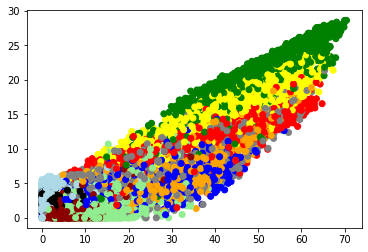

In [12]:
encoder = extract_layers(autoencoder_2,0,1)
l_space(encoder,x_test,y_test)


## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



In [20]:
latent_dim=10
autoencoder3 = tf.keras.Sequential(
[
  tf.keras.layers.InputLayer(input_shape=(28,28,1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(latent_dim, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),
  tf.keras.layers.Dense(latent_dim, activation='relu'),
  tf.keras.layers.Dense(784, activation='sigmoid'),
  tf.keras.layers.Reshape((28, 28,1))
]
)
autoencoder3.summary()


autoencoder3.compile(optimizer='adam', loss='mse')
autoencoder3.fit(x_train, x_train,epochs=5,batch_size=50)




Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                7850      
                                                                 
 dense_20 (Dense)            (None, 2)                 22        
                                                                 
 dense_21 (Dense)            (None, 10)                30        
                                                                 
 dense_22 (Dense)            (None, 784)               8624      
                                                                 
 reshape_4 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 16,526
Trainable params: 16,526
Non-tra

313/313 [==============================] - 1s 2ms/step


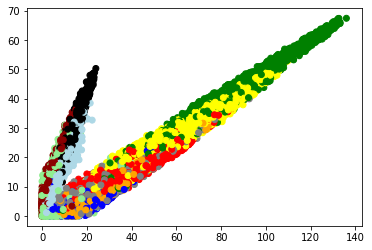

In [21]:
encoder = extract_layers(autoencoder3,0,2)
l_space(encoder,x_test,y_test)

## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


In [15]:
autoencoder4 = tf.keras.Sequential(
[
  tf.keras.layers.InputLayer(input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(filters= 32,kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(filters= 32,kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(2, activation='relu'),


  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(7*7*32, activation='relu'),
  tf.keras.layers.Reshape((7,7,32)),
  tf.keras.layers.UpSampling2D((2,2)),
  tf.keras.layers.Conv2DTranspose(filters= 32,kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.UpSampling2D((2,2)),
  tf.keras.layers.Conv2DTranspose(filters= 32,kernel_size=(3,3), activation='relu', padding='same'),
  tf.keras.layers.Conv2D(filters= 1,kernel_size=(3,3), activation='sigmoid', padding='same'),
  
]
)



autoencoder4.summary()

autoencoder4.compile(optimizer='adam', loss='mse')
autoencoder4.fit(x_train, x_train,epochs=5,batch_size=256)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dense_15 (Dense)            (None, 10)               

313/313 [==============================] - 3s 11ms/step


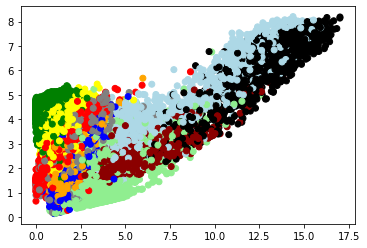

In [23]:
encoder = extract_layers(autoencoder4,0,6)
encoder.build((None,28,28,1))
l_space(encoder,x_test,y_test)


## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



In [16]:
decoder_2=extract_layers(autoencoder_2,2,3)
decoder3=extract_layers(autoencoder3,3,5)
decoder4=extract_layers(autoencoder4,7,14)

rand_input = np.random.rand(10,2)
decoded_rand_2 = np.squeeze(decoder_2.predict(rand_input))
decoded_rand3 = np.squeeze(decoder3.predict(rand_input))
decoded_rand4 = np.squeeze(decoder4.predict(rand_input))

1/1 [==============================] - 0s 426ms/step


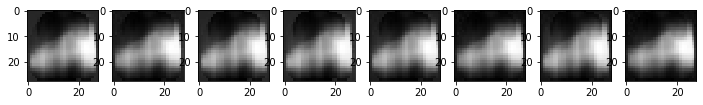

In [17]:
def images(imgs):
  fig = plt.figure(figsize=(12,2))
  axes = fig.subplots(1,8)
  for i,ax in enumerate(axes):
    ax.imshow(imgs[i],cmap="gray")

images(decoded_rand_2)
#images(decoded_rand_2_10_784)
#images(decoded_rand_conv_2_784)

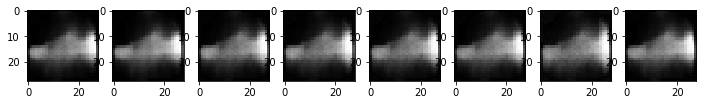

In [18]:
images(decoded_rand3)

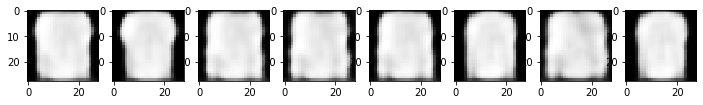

In [19]:
images(decoded_rand4)